In [2]:
# Exportação de bibliotecas necessária para o case

import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Criando um Sistema de Recomendação

Com os dados obtidos sobre os usuários, titulos de livros e avaliações dos usuários as obras, com o intuito de otimizar e melhorar a experiência do cliente amazon, criaremos um sitema de recomendação através de algorítimos de aprendizagem de máquina.

Através da técnica K-Nearest Neighbors (KNN), o algoritmo KNN um método não paramétrico qie se baseia na proximidade dos exemplos de treinamento para tomar decisões de classificação ou regressão. Basicamente esse algoritimo identifica através da similiridade para qual classe um ponto/dado pertence. Dentro da ambiemte ML, o algotimo de KNN é considerado um algoritimo consideravelmente de fácil entendimento, no entanto nçao deixa de ser muito útil, muitas vezes aplicado para reconhecimento de padrões, detectação de fraude e como o caso apresentado, para sistemas de recomendações

# Exportando os Dataset

### Exportando e entendo o dataset Book

In [15]:
df_book = pd.read_csv("BX_Books.csv", sep=";", encoding="latin-1")
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### Podemos entender esse dataset como uma base de dados sobre informações obras (livros), composto por código do livro, título da obra, autor da obra, Ano da publicaçao da obra, Editora e outras três variáveis com link da imagem do livro, cada coluna indica um tamanho da imagem, podemos enetendo S-small(pequeno), M-medium (médio) e L-Large(grande).

##### ISBN = International Standard Book Number (Número Padrão Internacional de Livro): Variável contendo um padrão númerico criado com o objetivo de fornecer um número de identificação para cada publicação monográfica
##### Book-Title = Titulo do livro: Variável que informa o nome da obra/livro
##### Book-Author = Nome do autor: Coluna informando o nome do autor responsável pela obra
##### Year-Of-Publication = Ano da publicação: Dados referente ao ano em que o livro/obra foi publicado
##### Publisher = Editora: Nome da editora responsável pela obra/livro
##### Image-URL-S = URL da imagem do livro tamanho pequeno
##### Image-URL-M = URL da imagem do livro tamanho médio
##### Image-URL-L = URL da imagem do livro tamanho grande

In [4]:
# Verificando o tamanho do dataset

df_book.shape

(271379, 8)

In [5]:
# Coletando algumas informaçoes iniciais

df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [6]:
# # Distribuição estatística dos dados 

df_book.describe()

,Year-Of-Publication
count,271379.000000
mean,1959.756050
std,258.011363
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


### Exportando e entendo o dataset Book-Rating

In [7]:
# Exportação do Dataset de avaliação dos livros

df_book_rating = pd.read_csv("BX-Book-Ratings.csv", sep=";", encoding="latin1")
df_book_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Podemos entender esse dataset como uma base de dados sobre avaliação dos usuários sobre obras (livros), composto por Id do usuário, código do livro e avaliação do usuário sobre o livro

##### User-ID = ID-Usuário: Variável conteno um código identificador de cada usuario
##### ISBN = International Standard Book Number (Número Padrão Internacional de Livro): Variável contendo um padrão númerico criado com o objetivo de fornecer um número de identificação para cada publicação monográfica
##### Book-Rating = Classificação do Livro: Variável responsável pelos dados de avaliação do usuário(User-ID) sobre as obras (ISBN) 

In [8]:
df_book_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
# # Distribuição estatística dos dados

df_book_rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Exportando e entendo o dataset Users

In [11]:
df_user = pd.read_csv("BX-Users.csv", sep=";", encoding="latin1")
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Podemos entender esse dataset como uma base de dados de informações sobre os usuários amazon (clientes), contendo o User-ID, Localidade do usuário e idade

##### User-ID = ID-Usuário: Variável conteno um código identificador de cada usuario
##### Location = Localização: Estado onde o usuário está localizado
##### Age = Idade: Idade do usuário

In [12]:
# Verificando o tamanho do dataset

df_user.shape

(278858, 3)

In [13]:
# Coletando algumas informaçoes iniciais

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
# # Distribuição estatística dos dados

df_user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


# Analise Explorátoria de Dados

Atráves de gráficos e informações de estatística preditiva podemos enxergar algumas possiveis tendências, além de gerarmos insights sobre as vendas de livros da Amazon

In [16]:
# Exportando Bibliotecas necessárias para gerarmos gráficos

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Contagem de Usuários por localidade: Top 10 localidades com mais usuários


top_local = df_user["Location"].value_counts().head(10)

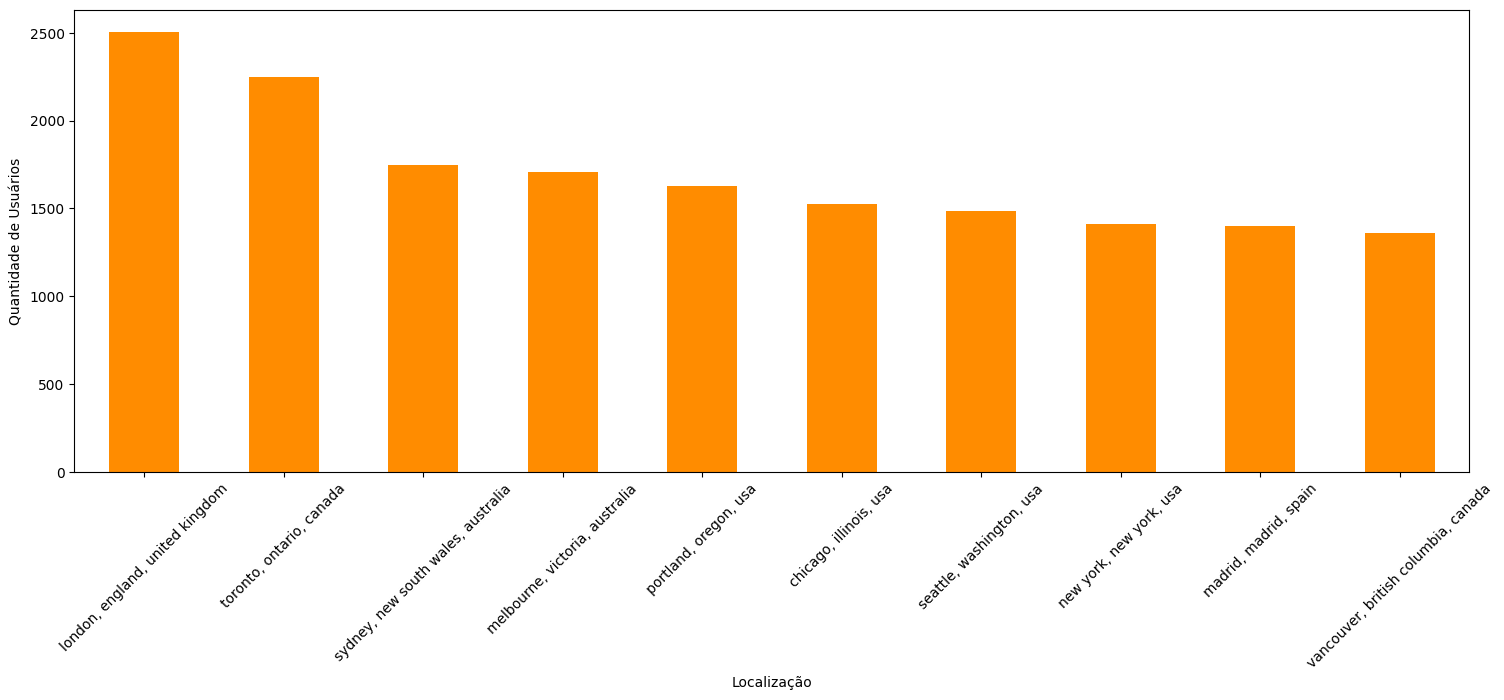

In [69]:
#Definnindo o tamanho da figura
plt.figure(figsize=(18,6))

#Gerando um gráfico de barras 
top_local.plot(kind='bar', color='darkorange')
plt.xlabel('Localização')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=45)

plt.show()

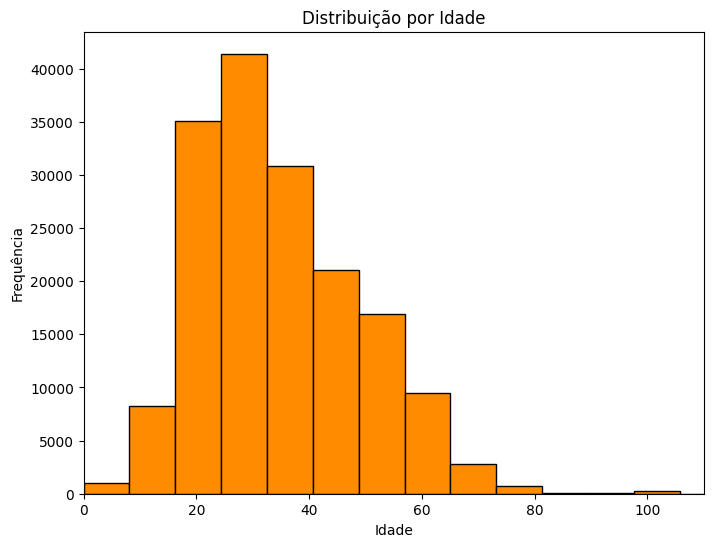

In [77]:
#Definnindo o tamanho da figura
plt.figure(figsize=(8,6))

# Criando um gráfico de histograma 
plt.hist(df_user["Age"],bins=30,  color="darkorange", edgecolor="black")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição por Idade")
plt.xlim(0, 110)

plt.show()